In [6]:
#import required libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing


In [7]:
#load uci dataset

df=pd.read_csv("UCI_data.csv", names=["age",'workclass','fnlwgt','Education','education_num',
                                      'marital_status','occupation','Relationship','race','sex',
                                      'capital_gain','capital_loss','hours_per_week','native_country','label'])

In [8]:
#dropping redundant columns

del(df['Education'])

In [9]:
# drop rows containing missing values

df=df.replace('?',np.nan)
df_refined=df.dropna()

In [10]:
df_refined.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,Relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:

workclass=df_refined.workclass.astype('category').cat.codes
workclass=pd.Series(workclass)

marital_status=df_refined.marital_status.astype('category').cat.codes
marital_status=pd.Series(marital_status)

occupation=df_refined.occupation.astype('category').cat.codes
occupation=pd.Series(occupation)

Relationship=df_refined.Relationship.astype('category').cat.codes
Relationship=pd.Series(Relationship)

race=df_refined.race.astype('category').cat.codes
race=pd.Series(race)

sex=df_refined.sex.astype('category').cat.codes
sex=pd.Series(sex)

native_country=df_refined.native_country.astype('category').cat.codes
native_country=pd.Series(native_country)

education_num=df_refined.education_num.astype('category').cat.codes
education_num=pd.Series(education_num)

label=df_refined.label.astype('category').cat.codes
label=pd.Series(label)


In [12]:
age=pd.Series(df['age'])

fnlwgt=pd.Series(df['fnlwgt'])

capital_gain=pd.Series(df['capital_gain'])

capital_loss=pd.Series(df['capital_loss'])

hours_per_week=pd.Series(df['hours_per_week'])

In [13]:
import statsmodels.api as sm

Label=np.array(label)
Label=Label.reshape(-1,1)

Input=np.column_stack((workclass,marital_status,occupation,Relationship,race,sex,native_country,education_num,age,fnlwgt,
                      capital_gain,capital_loss,hours_per_week))
Input=sm.tools.add_constant(Input,prepend=True)

Input[1]

array([1.0000e+00, 6.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00,
       4.0000e+00, 1.0000e+00, 3.9000e+01, 1.2000e+01, 5.0000e+01,
       8.3311e+04, 0.0000e+00, 0.0000e+00, 1.3000e+01])

In [14]:
#splitting train test data
from sklearn.model_selection import train_test_split

Train_input, Test_input, Train_label, Test_label = train_test_split(Input,Label, test_size=0.2)

In [15]:
scaler_x = preprocessing.MinMaxScaler()

print(scaler_x.fit(Train_input))


Train_input=scaler_x.transform(Train_input)

print(scaler_x.fit(Test_input))

Test_input=scaler_x.transform(Test_input)

MinMaxScaler()
MinMaxScaler()


In [16]:
dropout_rate=0.2
import tensorflow as tf
from keras import layers, models

model= models.Sequential()
model.add(tf.keras.Input(shape=(Input.shape[1])))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(416768, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                225       
_________________________________________________________________
dense_1 (Dense)              (None, 416768)            6668288   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 416769    
Total params: 7,085,282
Trainable params: 7,085,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics='accuracy')

In [19]:
history=model.fit(Train_input,Train_label,batch_size=128,epochs=50,validation_data=(Test_input,Test_label))

Epoch 1/50
204/204 [==============================] - 15s 54ms/step - loss: 0.4390 - accuracy: 0.7919 - val_loss: 0.4065 - val_accuracy: 0.7975
Epoch 2/50
204/204 [==============================] - 11s 52ms/step - loss: 0.3826 - accuracy: 0.8187 - val_loss: 0.3759 - val_accuracy: 0.8199
Epoch 3/50
204/204 [==============================] - 11s 52ms/step - loss: 0.3602 - accuracy: 0.8289 - val_loss: 0.3529 - val_accuracy: 0.8323
Epoch 4/50
204/204 [==============================] - 11s 52ms/step - loss: 0.3468 - accuracy: 0.8372 - val_loss: 0.3495 - val_accuracy: 0.8346
Epoch 5/50
204/204 [==============================] - 11s 52ms/step - loss: 0.3390 - accuracy: 0.8400 - val_loss: 0.3444 - val_accuracy: 0.8343
Epoch 6/50
204/204 [==============================] - 11s 52ms/step - loss: 0.3387 - accuracy: 0.8405 - val_loss: 0.3507 - val_accuracy: 0.8303
Epoch 7/50
204/204 [==============================] - 11s 52ms/step - loss: 0.3406 - accuracy: 0.8405 - val_loss: 0.3414 - val_accuracy:

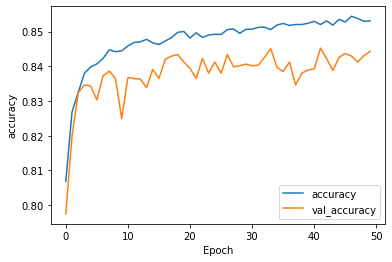

In [20]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'],loc='lower right')